<a href="https://colab.research.google.com/github/Eleazarrr1979/InterpretableCNN_LUCID/blob/master/WORKING_Feature_Visualisation_with_InceptionV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install, Import, Load Model

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# Install Lucid
!pip install --quiet lucid==0.3.1
# Import libraries
import numpy as np
import tensorflow as tf
import scipy.ndimage as nd

from google.colab import files

import lucid.modelzoo.vision_models as models
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform
from lucid.misc.io import show, load
from lucid.misc.io.reading import read



In [ ]:
# Import the InceptionV3 (GoogLeNet) model from the Lucid modelzoo

model = models.InceptionV2_slim()
model.load_graphdef()

## Setup

In [ ]:
def imgToModelSize(arr):
  W = model.image_shape[0]
  w, h, _ = arr.shape
  s = float(W) / min(w,h)
  arr = nd.zoom(arr, [s, s, 1], mode="nearest")
  w, h, _ = arr.shape
  dw, dh = (w-W)//2, (h-W)//3
  return arr[dw:dw+W, dh:dh+W]

In [ ]:
@objectives.wrap_objective
def dot_compare(layer, batch=1, cossim_pow=0):
  def inner(T):
    dot = tf.reduce_sum(T(layer)[batch] * T(layer)[0])
    mag = tf.sqrt(tf.reduce_sum(T(layer)[0]**2))
    cossim = dot/(1e-6 + mag)
    return dot * cossim ** cossim_pow
  return inner

In [ ]:
def feature_inversion(img=None, layer=None, n_steps=512, cossim_pow=0.0):
  with tf.Graph().as_default(), tf.Session() as sess:
    img = imgToModelSize(img)
    
    objective = objectives.Objective.sum([
        1.0 * dot_compare(layer, cossim_pow=cossim_pow),
        objectives.blur_input_each_step(),
    ])

    t_input = tf.placeholder(tf.float32, img.shape)
    param_f = param.image(img.shape[0], decorrelate=True, fft=True, alpha=False)
    param_f = tf.stack([param_f[0], t_input])

    transforms = [
      transform.pad(8, mode='constant', constant_value=.5),
      transform.jitter(8),
      transform.random_scale([0.9, 0.95, 1.05, 1.1] + [1]*4),
      transform.random_rotate(range(-5, 5) + [0]*5),
      transform.jitter(2),
    ]

    T = render.make_vis_T(model, objective, param_f, transforms=transforms)
    loss, vis_op, t_image = T("loss"), T("vis_op"), T("input")

    tf.global_variables_initializer().run()
    for i in range(n_steps): _ = sess.run([vis_op], {t_input: img})

    result = t_image.eval(feed_dict={t_input: img})
    show(result[0])

In [ ]:
models.InceptionV2_slim.layers

[Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Conv2d_1a_7x7/Relu: 64> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Conv2d_2b_1x1/Relu: 64> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Conv2d_2c_3x3/Relu: 192> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Mixed_3b/concat: 256> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Mixed_3c/concat: 320> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Mixed_4a/concat: 576> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Mixed_4b/concat: 576> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Mixed_4c/concat: 576> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <InceptionV2/InceptionV2/Mixed_4d/concat: 576> ([set(['conv'])]),
 Layer (belonging to InceptionV2_slim) <Inceptio

# Visualisations for All Layeres

Saving IMG_10.jpeg to IMG_10.jpeg



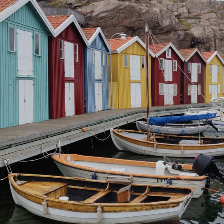


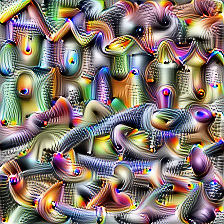

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  img = load(fn)
  show(imgToModelSize(img))
  feature_inversion(img, layer='InceptionV2/InceptionV2/Mixed_4a/concat')


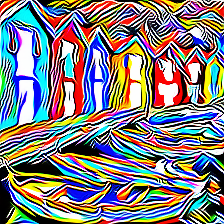


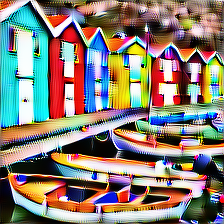


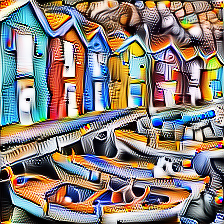


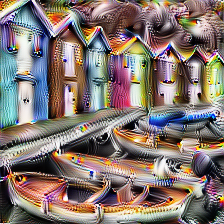


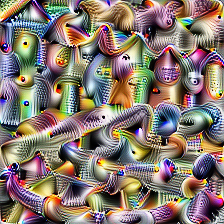


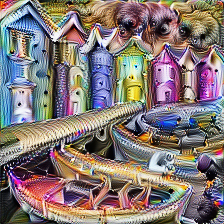


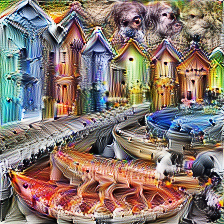


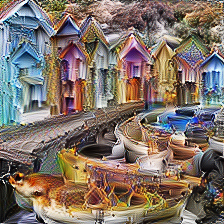


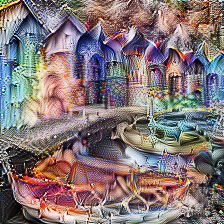


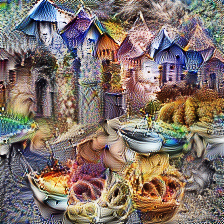


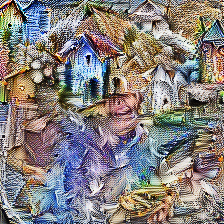


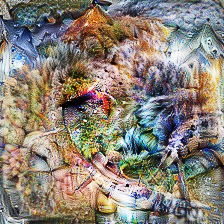

In [ ]:
#feature_inversion(img, layer=  'InceptionV2/InceptionV2/Conv2d_1a_7x7/Relu')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Conv2d_2b_1x1/Relu')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Conv2d_2c_3x3/Relu')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_3b/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_3c/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_4a/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_4b/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_4c/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_4d/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_4e/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_5a/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_5b/concat')
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_5c/concat')



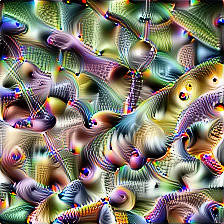

In [ ]:
feature_inversion(img, layer= 'InceptionV2/InceptionV2/Mixed_4a/concat')